In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data.add_function(lambda x: np.sin(6*x)+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.init_params()
display(sm.get_params())
mogptk.plot_sm_psd(sm)

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
mogptk.plot_sm_psd(sm)

In [ ]:
sm.set_prediction_range(0, 0.0, 5.0, n=2000)
sm.predict()
mogptk.plot(sm)

In [ ]:
sm.save('sm')

In [ ]:
sm2 = mogptk.load('sm')
sm2.set_prediction_range(0, 0.0, 10.0, n=2000)
sm2.predict()
mogptk.plot(sm2)

## MOSM

In [5]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([1.27273869]),
  'mean': array([[-1.24071388]]),
  'variance': array([[0.70258174]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.88317577])},
 {'magnitude': array([0.98859091]),
  'mean': array([[-1.10544943]]),
  'variance': array([[0.30069469]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.44391757])},
 {'magnitude': array([1.52253614]),
  'mean': array([[1.06389367]]),
  'variance': array([[0.2888446]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.35335582])}]

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -397.138522
  Number of iterations: 76
  Number of functions evaluations: 136


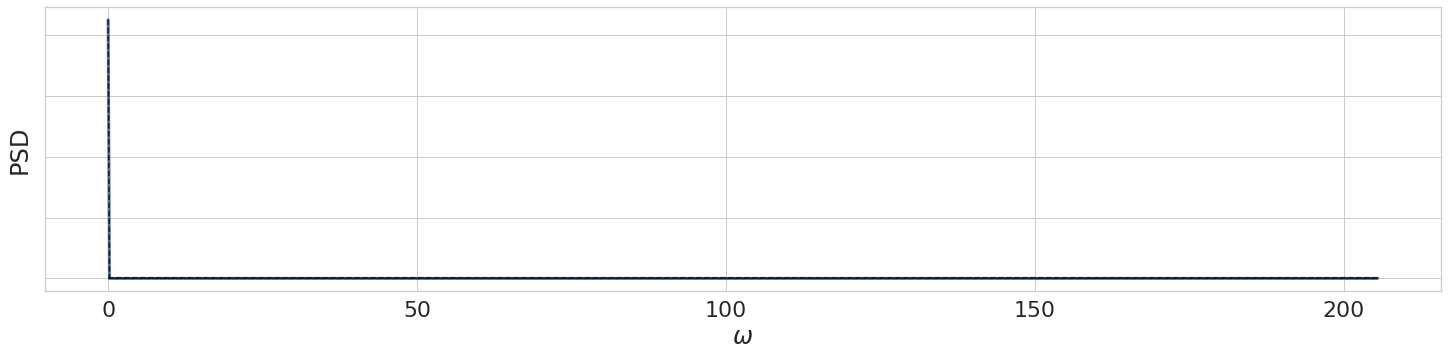

[{'magnitude': array([0.50126626]),
  'mean': array([[5.99530555]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.88317577])},
 {'magnitude': array([3.9951919]),
  'mean': array([[6.28318531e-06]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.44391757])},
 {'magnitude': array([1.e-06]),
  'mean': array([[6.28318531e-06]]),
  'variance': array([[88.3209653]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.35335582])}]

In [6]:
mosm.init_params(plot=True)
display(mosm.get_params())

In [7]:
mosm.train()
display(mosm.get_params())

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -397.073481
  Number of iterations: 83
  Number of functions evaluations: 117


[{'magnitude': array([13.72872027]),
  'mean': array([[5.99532314]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([2.25659154])},
 {'magnitude': array([4.0379551]),
  'mean': array([[3.58805456e-06]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.98319859])},
 {'magnitude': array([-7.49224252e-09]),
  'mean': array([[6.27740283e-06]]),
  'variance': array([[88.32045766]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.71681317])}]

In [ ]:
mosm.set_prediction_range(0, 0.0, 5.0, n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.init_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.set_prediction_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [8]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

[{'constant': array([0.56984938]), 'variance': array([[0.55969321]])},
 {'constant': array([0.81027868]), 'variance': array([[0.51963776]])},
 {'constant': array([0.08357516]), 'variance': array([[0.64579016]])}]

In [ ]:
cg.init_params()
display(cg.get_params())

In [9]:
cg.train(method='Adam')
display(cg.get_params())

[{'constant': array([2.376959]), 'variance': array([[3.37679494]])},
 {'constant': array([1.21186611]), 'variance': array([[0.1150187]])},
 {'constant': array([1.34432135]), 'variance': array([[4.05077361]])}]

In [ ]:
cg.set_prediction_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot(cg)